<h1> Step 1. Import the necessary libraries </h1>

In [88]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression




#read data
sp_data = pd.read_csv('archive/SP500.csv')
nas_data = pd.read_csv('archive/Nasdaq.csv')
dow_data = pd.read_csv('archive/DowJones.csv')
rate_data = pd.read_csv('rates.csv')

In [89]:
rate_data

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
900,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3
901,2017,2,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2
902,2017,3,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN


In [90]:
sp_data

,Date,Value
0,1977-09-02,97.45
1,1977-09-09,96.37
2,1977-09-16,96.48
3,1977-09-23,95.04
4,1977-09-30,96.53
...,...,...
2079,2017-08-04,2476.83
2080,2017-08-11,2441.32
2081,2017-08-18,2425.55
2082,2017-08-25,2443.05


In [91]:
nas_data

,Date,Value
0,1977-09-02,100.8300
1,1977-09-09,100.9100
2,1977-09-16,100.7400
3,1977-09-23,99.5700
4,1977-09-30,100.8500
...,...,...
2078,2017-08-04,6351.5600
2079,2017-08-11,6256.5600
2080,2017-08-18,6216.5300
2081,2017-08-25,6265.6400


In [92]:
dow_data

,Date,Value
0,1977-09-02,872.31
1,1977-09-09,857.04
2,1977-09-16,856.81
3,1977-09-23,839.14
4,1977-09-30,847.11
...,...,...
2077,2017-08-04,22092.81
2078,2017-08-11,21858.32
2079,2017-08-18,21674.51
2080,2017-08-25,21813.67


<h1> Step 2. Check the data has duplicate values </h1>

In [93]:
duplicates = rate_data[rate_data.duplicated()]
duplicates


,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate


<h1> Step 3. Check the data has missing values </h1>

In [94]:
# check for missing values
sp_data.isnull().sum()

nas_data.isnull().sum()

dow_data.isnull().sum()

rate_data.isnull().sum()


Year                              0
Month                             0
Day                               0
Federal Funds Target Rate       442
Federal Funds Upper Target      801
Federal Funds Lower Target      801
Effective Federal Funds Rate    152
Real GDP (Percent Change)       654
Unemployment Rate               152
Inflation Rate                  194
dtype: int64

In [95]:
# drop a row if it has a missing value of Effective Federal Funds Rate column
rate_data.dropna(subset=['Effective Federal Funds Rate'], inplace=True)
rate_data.isnull().sum()


Year                              0
Month                             0
Day                               0
Federal Funds Target Rate       437
Federal Funds Upper Target      654
Federal Funds Lower Target      654
Effective Federal Funds Rate      0
Real GDP (Percent Change)       502
Unemployment Rate                 0
Inflation Rate                   42
dtype: int64

<h1> Step 4. Unify the date format </h1>

In [96]:
rate_data['Date'] = pd.to_datetime(rate_data[['Year', 'Month', 'Day']])
#put Date column as the first column
cols = rate_data.columns.tolist()
cols = cols[-1:] + cols[:-1]
rate_data = rate_data[cols]
rate_data.head()

,Date,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954-07-01,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954-08-01,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954-09-01,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954-10-01,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954-11-01,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


In [97]:
# drop unnecessary columns
# drop Year, Month, Day columns
rate_data.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)
rate_data


C:\Users\ninan.PLSNO\AppData\Local\Temp\ipykernel_18436\3126843413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_data.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)


,Date,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954-07-01,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954-08-01,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954-09-01,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954-10-01,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954-11-01,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...
896,2016-10-01,NaN,0.50,0.25,0.40,1.9,4.8,2.1
897,2016-11-01,NaN,0.50,0.25,0.41,NaN,4.6,2.1
898,2016-12-01,NaN,0.50,0.25,0.54,NaN,4.7,2.2
900,2017-01-01,NaN,0.75,0.50,0.65,NaN,4.8,2.3


<h1> Step 5. Simplify the data </h1>

In [98]:
#convert the date column to a datetime object and set it as the index of the DataFrame

sp_data['Date'] = pd.to_datetime(sp_data['Date'])
sp_data = sp_data.set_index('Date')
dow_data['Date'] = pd.to_datetime(dow_data['Date'])
dow_data = dow_data.set_index('Date')
nas_data['Date'] = pd.to_datetime(nas_data['Date'])
nas_data = nas_data.set_index('Date')


In [99]:
# You can use the resample() function to resample the stock data to monthly frequency, and use the mean of the values for each month as the value for that month.

sp_data_monthly = sp_data.resample('M').mean()
dow_data_monthly = dow_data.resample('M').mean()
nas_data_monthly = nas_data.resample('M').mean()

sp_data_monthly

# Now, you have both stock data and rate data on the same frequency (monthly) and ready for visualization.

,Value
Date,
1977-09-30,96.3740
1977-10-31,93.6150
1977-11-30,94.8950
1977-12-31,94.3020
1978-01-31,89.9450
...,...
2017-04-30,2354.3450
2017-05-31,2396.9350
2017-06-30,2433.1400


In [100]:
print(sp_data.describe())
print(dow_data.describe())
print(nas_data.describe())

             Value
count  2084.000000
mean    843.222778
std     624.002075
min      87.450000
25%     264.235000
50%     830.850000
75%    1291.420000
max    2476.830000
              Value
count   2082.000000
mean    7284.248833
std     5546.322304
min      747.310000
25%     2041.787500
50%     7580.870000
75%    10991.700000
max    22092.810000
             Value
count  2083.000000
mean   1652.703695
std    1490.111816
min      97.210000
25%     375.650000
50%    1337.520000
75%    2434.870000
max    6387.750000


In [101]:
index_data = pd.merge(sp_data, nas_data, on='Date')
index_data = pd.merge(index_data, dow_data, on='Date')

corr = index_data.corr()
corr

,Value_x,Value_y,Value
Value_x,1.000000,0.977250,0.995417
Value_y,0.977250,1.000000,0.965677
Value,0.995417,0.965677,1.000000


In [102]:
# Create a new dataframe that contains only the date and Effective Federal Funds Rate columns
new_rate_data = rate_data[['Date', 'Effective Federal Funds Rate']]
new_rate_data

,Date,Effective Federal Funds Rate
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.06
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
896,2016-10-01,0.40
897,2016-11-01,0.41
898,2016-12-01,0.54
900,2017-01-01,0.65


In [103]:
# Changing the format of date in index data
sp_data = sp_data.rename(columns={'original_column_name': 'Date'})

# Changing the format of date in rate data
new_rate_data["Date"]= pd.to_datetime(new_rate_data["Date"])

# Merging the dataframe on date
merged_data = pd.merge(sp_data, new_rate_data, on='Date')

corr = merged_data.corr()
print(corr)

                                Value  Effective Federal Funds Rate
Value                         1.00000                      -0.76075
Effective Federal Funds Rate -0.76075                       1.00000


C:\Users\ninan.PLSNO\AppData\Local\Temp\ipykernel_18436\1360235187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rate_data["Date"]= pd.to_datetime(new_rate_data["Date"])
C:\Users\ninan.PLSNO\AppData\Local\Temp\ipykernel_18436\1360235187.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_data.corr()


<p> The correlation coefficient is represented by a value between -1 and 1. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates no correlation.

In this case, the correlation coefficient between the value column of index data and the Effective Federal Funds Rate column of the new_rate_data is -0.76075. This means that there is a strong negative correlation between the two variables, indicating that as the Effective Federal Funds Rate increases the value of the index data decreases and as the Effective Federal Funds Rate decreases the value of the index data increases. </p>

<h1> Step 6. Graph the data </h1>

<AxesSubplot: xlabel='Date', ylabel='Value'>

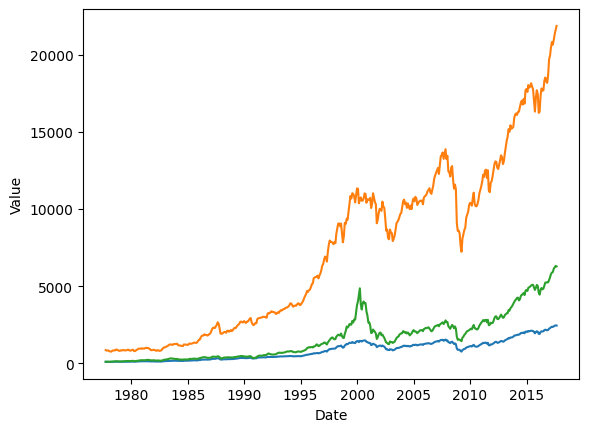

In [104]:
sns.lineplot(x=sp_data_monthly.index, y='Value', data=sp_data_monthly)
sns.lineplot(x=dow_data_monthly.index, y='Value', data=dow_data_monthly)
sns.lineplot(x=nas_data_monthly.index, y='Value', data=nas_data_monthly)

# You can see that the stock data and the rate data are on different scales. You can use the subplots() function to plot the stock data and the rate data on the same plot.

<AxesSubplot: xlabel='Date', ylabel='Effective Federal Funds Rate'>

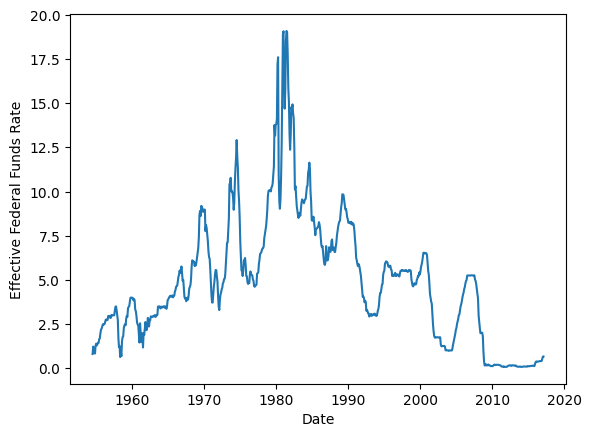

In [105]:
sns.lineplot(x=rate_data['Date'], y=rate_data['Effective Federal Funds Rate'])

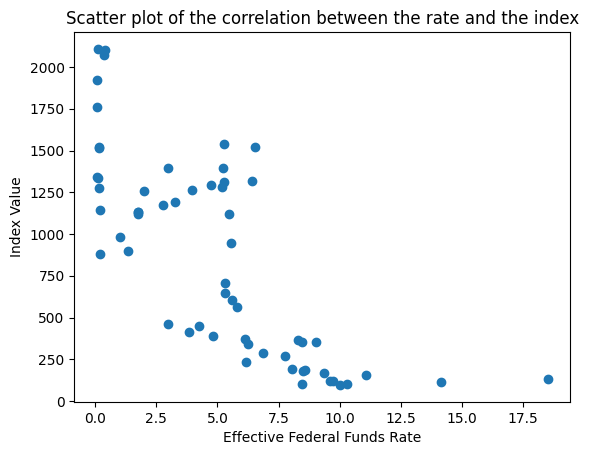

In [106]:
# Create a scatter plot of the correlation
plt.scatter(merged_data['Effective Federal Funds Rate'], merged_data['Value'])

# Add axis labels
plt.xlabel('Effective Federal Funds Rate')
plt.ylabel('Index Value')

# Add title
plt.title('Scatter plot of the correlation between the rate and the index')

# Show the plot
plt.show()



<p>  create a scatter plot that shows the correlation between the new_rate_data and the index data. The x-axis will represent the Effective Federal Funds Rate column of the new_rate_data and the y-axis will represent the value column of the index data. </p>

In [108]:
# Extract the values
x = merged_data['Effective Federal Funds Rate'].values.reshape(-1, 1)
y = merged_data['Value']

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)

# Calculate R-squared
r2 = model.score(x, y)
print('Coefficient of determination:', r2)

Coefficient of determination: 0.5787411303191845


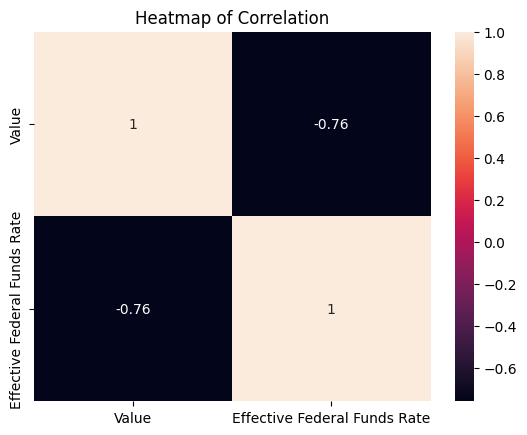

In [ ]:
sns.heatmap(corr, annot=True)
plt.title('Heatmap of Correlation')
plt.show()


<p> shows the correlation matrix between the data. </p>